In [1]:
import pandas as pd
#read in data using pandas
train_df = pd.read_csv("AQI_Delhi.csv",encoding='cp1252')
test_df = pd.read_csv("AQI_Delhi_Test.csv",encoding='cp1252')
#check data has been read in properly
train_df.tail()

,Date,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH,AQI
1191,15/07/2018,21.54,152.37,91.524669,213.08,587.38,24.57,128.46,0.57,54.22,335.266279,625.371304,528.871633,415.688367,615.547143,7,15,196,7,390.826835
1192,16/07/2018,18.73,145.67,32.721887,165.65,375.88,25.19,85.08,0.96,48.53,390.826835,335.266279,625.371304,528.871633,415.688367,1,16,197,7,830.700408
1193,17/07/2018,19.61,135.03,15.914445,112.71,422.68,24.94,97.87,1.96,51.11,830.700408,390.826835,335.266279,625.371304,528.871633,2,17,198,7,782.881739
1194,18/07/2018,24.11,128.26,59.445802,463.68,713.95,23.76,175.26,1.88,49.45,782.881739,830.700408,390.826835,335.266279,625.371304,3,18,199,7,688.028261
1195,19/07/2018,20.35,197.55,84.779065,202.14,697.16,21.77,281.35,0.68,55.88,688.028261,782.881739,830.700408,390.826835,335.266279,4,19,200,7,872.421837


In [2]:
#create a dataframe with all training data
train_X = train_df.drop(columns=['AQI','Date', 'SO2', 'NO2', 'O3'])
test_X = test_df.drop(columns=['AQI','Date', 'SO2', 'NO2', 'O3'])
# train_X = train_df.drop(columns=['AQI', 'Date'])
# test_X = test_df.drop(columns=['AQI', 'Date'])
#check that the variables have been removed
train_X.head() 


,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH
0,83.02,482.61,30.16,263.99,1.5,31.26,417.901739,475.049130,396.315696,326.702405,265.960000,6,11,101,4
1,84.02,483.61,31.16,264.99,2.5,32.26,746.352174,417.901739,475.049130,396.315696,326.702405,7,12,102,4
2,85.02,484.61,32.16,265.99,3.5,33.26,141.397315,746.352174,417.901739,475.049130,396.315696,1,13,103,4
3,86.02,485.61,33.16,266.99,4.5,34.26,267.807931,141.397315,746.352174,417.901739,475.049130,2,14,104,4
4,87.02,486.61,34.16,267.99,5.5,35.26,352.743165,267.807931,141.397315,746.352174,417.901739,3,15,105,4


In [3]:
#create a dataframe with only the target column
train_y = train_df[['AQI']]
test_y = test_df[['AQI']]
date = test_df[['Date']]

#view dataframe
train_y.tail()

,AQI
1191,390.826835
1192,830.700408
1193,782.881739
1194,688.028261
1195,872.421837


In [4]:
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(15, activation='relu', input_shape=(n_cols,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1))

Using TensorFlow backend.
W0820 01:41:31.641902 140526187628352 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 01:41:31.655619 140526187628352 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 01:41:31.659127 140526187628352 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

W0820 01:41:31.705646 140526187628352 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=30)
#train model
model.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

W0820 01:41:32.784416 140526187628352 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0820 01:41:32.867230 140526187628352 deprecation_wrapper.py:119] From /home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/300
1196/1196 [==============================] - 0s 210us/step - loss: 165654.2398
Epoch 2/300
1196/1196 [==============================] - 0s 33us/step - loss: 44607.2475
Epoch 3/300
1196/1196 [==============================] - 0s 32us/step - loss: 39547.7197
Epoch 4/300
1196/1196 [==============================] - 0s 28us/step - loss: 36728.1663
Epoch 5/300
1196/1196 [==============================] - 0s 28us/step - loss: 34866.0770
Epoch 6/300
1196/1196 [==============================] - 0s 33us/step - loss: 33130.7836
Epoch 7/300
  32/1196 [..............................] - ETA: 0s - loss: 13989.7734

/home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1196/1196 [==============================] - 0s 40us/step - loss: 32266.7428
Epoch 8/300
1196/1196 [==============================] - 0s 33us/step - loss: 31385.7124
Epoch 9/300
1196/1196 [==============================] - 0s 30us/step - loss: 30796.2274
Epoch 10/300
1196/1196 [==============================] - 0s 30us/step - loss: 30298.9512
Epoch 11/300
1196/1196 [==============================] - 0s 30us/step - loss: 30082.0338
Epoch 12/300
1196/1196 [==============================] - 0s 34us/step - loss: 30002.5654
Epoch 13/300
1196/1196 [==============================] - 0s 29us/step - loss: 29871.8827
Epoch 14/300
1196/1196 [==============================] - 0s 37us/step - loss: 29863.7071
Epoch 15/300
1196/1196 [==============================] - 0s 29us/step - loss: 29421.7819
Epoch 16/300
1196/1196 [==============================] - 0s 30us/step - loss: 29591.4323
Epoch 17/300
1196/1196 [==============================] - 0s 31us/step - loss: 29483.0435
Epoch 18/300
1196/1196 [=

1196/1196 [==============================] - 0s 29us/step - loss: 27409.8748
Epoch 99/300
1196/1196 [==============================] - 0s 26us/step - loss: 27518.2753
Epoch 100/300
1196/1196 [==============================] - 0s 30us/step - loss: 27519.4168
Epoch 101/300
1196/1196 [==============================] - 0s 30us/step - loss: 27233.1671
Epoch 102/300
1196/1196 [==============================] - 0s 29us/step - loss: 27374.8414
Epoch 103/300
1196/1196 [==============================] - 0s 32us/step - loss: 27484.8956
Epoch 104/300
1196/1196 [==============================] - 0s 29us/step - loss: 27313.3732
Epoch 105/300
1196/1196 [==============================] - 0s 28us/step - loss: 27115.6884
Epoch 106/300
1196/1196 [==============================] - 0s 29us/step - loss: 27105.1491
Epoch 107/300
1196/1196 [==============================] - 0s 30us/step - loss: 27446.9369
Epoch 108/300
1196/1196 [==============================] - 0s 27us/step - loss: 27210.1742
Epoch 109/300


1196/1196 [==============================] - 0s 30us/step - loss: 26722.1073
Epoch 189/300
1196/1196 [==============================] - 0s 34us/step - loss: 26324.3929
Epoch 190/300
1196/1196 [==============================] - 0s 27us/step - loss: 26585.6794
Epoch 191/300
1196/1196 [==============================] - 0s 30us/step - loss: 26317.1144
Epoch 192/300
1196/1196 [==============================] - 0s 29us/step - loss: 26359.9409
Epoch 193/300
1196/1196 [==============================] - 0s 28us/step - loss: 26528.8612
Epoch 194/300
1196/1196 [==============================] - 0s 28us/step - loss: 26779.8488
Epoch 195/300
1196/1196 [==============================] - 0s 29us/step - loss: 26357.8993
Epoch 196/300
1196/1196 [==============================] - 0s 31us/step - loss: 26400.7125
Epoch 197/300
1196/1196 [==============================] - 0s 31us/step - loss: 26941.0596
Epoch 198/300
1196/1196 [==============================] - 0s 27us/step - loss: 26617.5009
Epoch 199/300

1196/1196 [==============================] - 0s 30us/step - loss: 25954.1450
Epoch 279/300
1196/1196 [==============================] - 0s 30us/step - loss: 26139.4877
Epoch 280/300
1196/1196 [==============================] - 0s 27us/step - loss: 25942.9137
Epoch 281/300
1196/1196 [==============================] - 0s 28us/step - loss: 26085.1729
Epoch 282/300
1196/1196 [==============================] - 0s 27us/step - loss: 25857.2221
Epoch 283/300
1196/1196 [==============================] - 0s 27us/step - loss: 25930.8910
Epoch 284/300
1196/1196 [==============================] - 0s 28us/step - loss: 25754.7505
Epoch 285/300
1196/1196 [==============================] - 0s 28us/step - loss: 25796.8244
Epoch 286/300
1196/1196 [==============================] - 0s 30us/step - loss: 25805.8387
Epoch 287/300
1196/1196 [==============================] - 0s 31us/step - loss: 25695.8830
Epoch 288/300
1196/1196 [==============================] - 0s 33us/step - loss: 25679.7255
Epoch 289/300

In [7]:
#make predictions on unseen data
test_y_predictions = model.predict(test_X)

In [8]:
l = []
print("Required Value \t \t Predicted Value \t Difference")
for i in range(13):
    l.append((test_y["AQI"][i] - test_y_predictions[i]))
    print(str(test_y["AQI"][i]) +"\t" + str(test_y_predictions[i]) + "\t\t" + str(l[i]))

Required Value 	 	 Predicted Value 	 Difference
788.9183673469389	[907.9479]		[-119.02948]
654.2379591836731	[797.8023]		[-143.56433]
592.5346938775509	[655.2936]		[-62.75891]
618.759591836735	[579.5857]		[39.17389]
568.1079591836731	[590.46564]		[-22.357666]
384.360506329114	[581.8813]		[-197.52078]
399.310759493671	[429.22858]		[-29.917816]
316.893720930233	[444.74976]		[-127.85605]
486.69956521739095	[376.24054]		[110.459015]
496.74304347826103	[567.86664]		[-71.1236]
782.881739130435	[598.1512]		[184.73053]
688.028260869565	[701.52423]		[-13.495972]
614.423913043478	[716.5664]		[-102.14252]


In [9]:
l.sort(reverse = True) 
print(l)

[array([184.73053], dtype=float32), array([110.459015], dtype=float32), array([39.17389], dtype=float32), array([-13.495972], dtype=float32), array([-22.357666], dtype=float32), array([-29.917816], dtype=float32), array([-62.75891], dtype=float32), array([-71.1236], dtype=float32), array([-102.14252], dtype=float32), array([-119.02948], dtype=float32), array([-127.85605], dtype=float32), array([-143.56433], dtype=float32), array([-197.52078], dtype=float32)]


In [10]:
#input layer weights
weights, biases = model.layers[0].get_weights()
print(weights)

[[-2.25970879e-01  1.02814548e-02 -1.23857431e-01 -9.29434821e-02
  -4.48145270e-02  1.78948969e-01 -1.63449571e-01 -4.29290622e-01
   6.39810622e-01  1.15642458e-01 -1.98322106e-02  4.26072687e-01
  -8.46687376e-01  4.48161900e-01  2.64879674e-01]
 [-2.71062583e-01  4.55006033e-01  3.29998463e-01  1.08848669e-01
   2.10206106e-01 -8.82946551e-02 -1.67012766e-01 -3.00586373e-01
   1.58552259e-01 -2.51167327e-01 -1.77276671e-01 -2.29413301e-01
   3.17361027e-01  4.51066673e-01  1.33262603e-02]
 [ 7.83885896e-01  2.24239603e-01  6.24535084e-01 -4.47301894e-01
   8.47899139e-01  4.55333531e-01  1.67449564e-01 -7.54841030e-01
   1.07060075e+00  2.33601093e-01 -4.52921569e-01  4.19421196e-01
  -6.22148216e-02 -4.42982018e-01 -2.46675074e-01]
 [ 2.52917539e-02 -2.96689689e-01 -1.14962608e-01 -3.91624957e-01
  -1.45257711e-01  7.37340152e-02  2.66165316e-01 -2.87013296e-02
   2.86706150e-01  6.38737679e-01  5.63649476e-01  1.32270694e-01
   4.26724106e-02 -4.28642899e-01  1.14567198e-01]
 [-1

In [11]:
#hidden layer weights
weights, biases = model.layers[1].get_weights()
print(weights)

[[-0.0666381  -0.19988087  0.40802005 -0.43316385 -0.80281764  0.19358797
   0.24969703 -0.24601503 -0.15187621 -0.23242716  0.43145537 -0.42406753
   0.09266834  0.5660104  -0.07967474]
 [-0.4203921  -0.06111491 -0.32730314 -0.18308645  0.00435228  0.30499992
  -0.4160098  -0.14439648  0.05441866 -0.27159613  0.43770644 -0.28005335
  -0.33106723  0.45599693  0.2576009 ]
 [ 0.3271548   0.03131623  0.14249313 -0.34718725 -0.46159714 -0.38101816
  -0.3495151   0.05516932 -0.07681356  0.11881745  0.38049546  0.23509616
   0.32712248  0.20902611 -0.41706365]
 [-0.45863774  0.12254794 -0.12505646  0.32058293  0.07303774 -0.518421
   0.2815264   0.24446937  0.3810229  -0.00940263 -0.0216894  -0.38442376
  -0.17674607 -0.20771547 -0.15635589]
 [-0.02691168  0.06205449  0.19077894 -0.23461722  0.09060715  0.33697864
   0.4690665  -0.29935187  0.08395465 -0.38543648  0.41125977 -0.10851958
   0.31756315  0.39402828 -0.24173896]
 [-0.13104613  0.24802648 -0.5070892  -0.40535823 -0.4664708  -0.46

In [12]:
#output layer weights
weights, biases = model.layers[2].get_weights()
print(weights)

[[-0.42786962]
 [-1.2280426 ]
 [-0.82787895]
 [-0.2193101 ]
 [-0.9518336 ]
 [-0.13613471]
 [-0.4728063 ]
 [-1.36608   ]
 [ 0.12928177]
 [-0.28409177]
 [ 0.28367043]
 [ 0.59158295]
 [-0.23968409]
 [ 0.59603435]
 [ 0.34695938]]


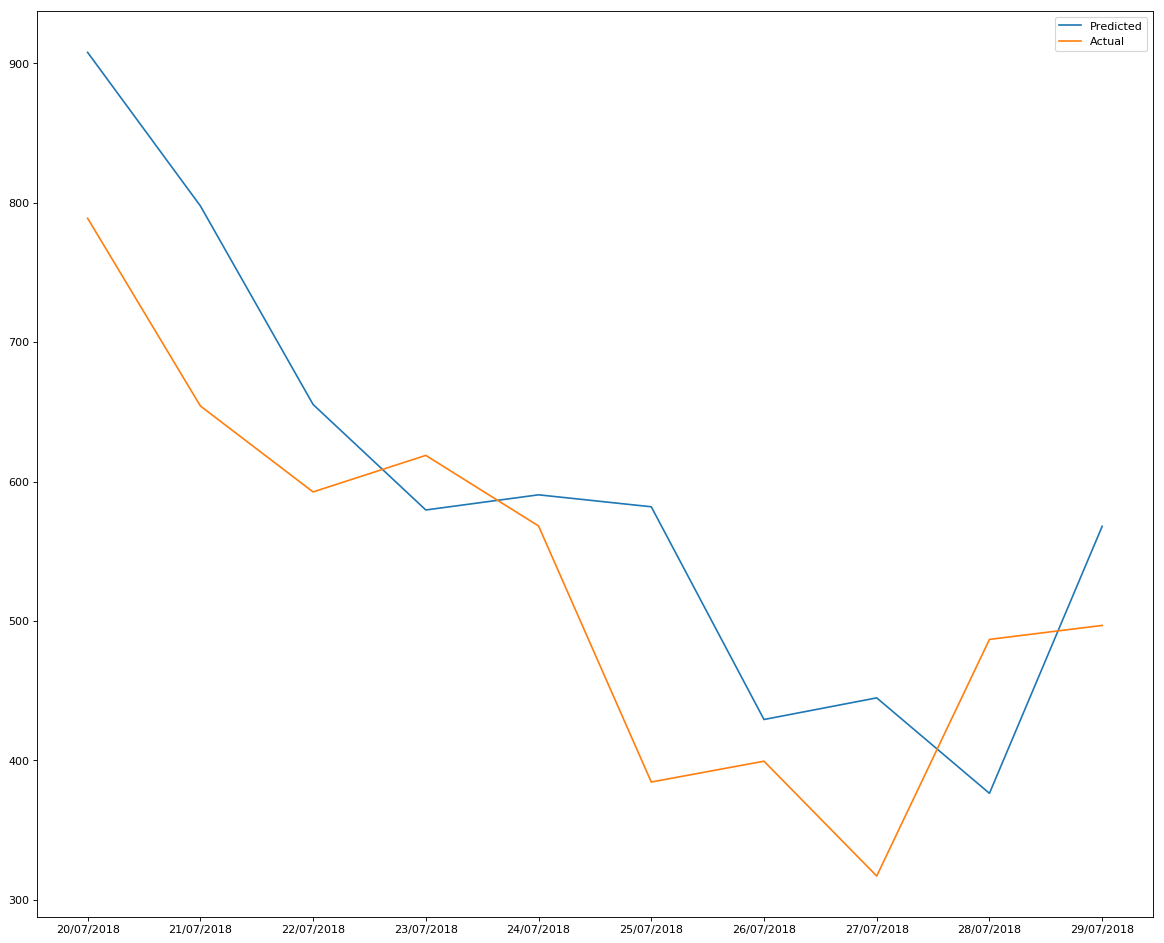

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()

In [15]:
#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(100, activation='relu'))
model_mc.add(Dense(100, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#train model
model_mc.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1196/1196 [==============================] - 0s 277us/step - loss: 57464.4037
Epoch 2/300
1196/1196 [==============================] - 0s 41us/step - loss: 30749.1305
Epoch 3/300
1196/1196 [==============================] - 0s 39us/step - loss: 29716.6149
Epoch 4/300
1196/1196 [==============================] - 0s 38us/step - loss: 29735.1451
Epoch 5/300
1196/1196 [==============================] - 0s 39us/step - loss: 29788.0067
Epoch 6/300
  32/1196 [..............................] - ETA: 0s - loss: 99756.2344

/home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1196/1196 [==============================] - 0s 45us/step - loss: 29880.3734
Epoch 7/300
1196/1196 [==============================] - 0s 34us/step - loss: 29458.6303
Epoch 8/300
1196/1196 [==============================] - 0s 38us/step - loss: 28539.4477
Epoch 9/300
1196/1196 [==============================] - 0s 36us/step - loss: 28825.5467
Epoch 10/300
1196/1196 [==============================] - 0s 42us/step - loss: 29357.6219
Epoch 11/300
1196/1196 [==============================] - 0s 39us/step - loss: 28338.8025
Epoch 12/300
1196/1196 [==============================] - 0s 41us/step - loss: 29339.8859
Epoch 13/300
1196/1196 [==============================] - 0s 42us/step - loss: 28599.0700
Epoch 14/300
1196/1196 [==============================] - 0s 40us/step - loss: 28227.7438
Epoch 15/300
1196/1196 [==============================] - 0s 36us/step - loss: 28397.9351
Epoch 16/300
1196/1196 [==============================] - 0s 40us/step - loss: 27971.0868
Epoch 17/300
1196/1196 [==

1196/1196 [==============================] - 0s 35us/step - loss: 15866.1928
Epoch 98/300
1196/1196 [==============================] - 0s 41us/step - loss: 17200.0267
Epoch 99/300
1196/1196 [==============================] - 0s 37us/step - loss: 16017.1563
Epoch 100/300
1196/1196 [==============================] - 0s 37us/step - loss: 16074.4603
Epoch 101/300
1196/1196 [==============================] - 0s 39us/step - loss: 15469.8001
Epoch 102/300
1196/1196 [==============================] - 0s 39us/step - loss: 15759.4923
Epoch 103/300
1196/1196 [==============================] - 0s 38us/step - loss: 16323.4243
Epoch 104/300
1196/1196 [==============================] - 0s 39us/step - loss: 16843.8343
Epoch 105/300
1196/1196 [==============================] - 0s 48us/step - loss: 16112.8265
Epoch 106/300
1196/1196 [==============================] - 0s 36us/step - loss: 15838.9911
Epoch 107/300
1196/1196 [==============================] - 0s 39us/step - loss: 16471.7621
Epoch 108/300
1

1196/1196 [==============================] - 0s 42us/step - loss: 9273.0796
Epoch 188/300
1196/1196 [==============================] - 0s 36us/step - loss: 7983.5810
Epoch 189/300
1196/1196 [==============================] - 0s 37us/step - loss: 7632.5462
Epoch 190/300
1196/1196 [==============================] - 0s 35us/step - loss: 7721.4379
Epoch 191/300
1196/1196 [==============================] - 0s 33us/step - loss: 7912.5296
Epoch 192/300
1196/1196 [==============================] - 0s 38us/step - loss: 7063.6651
Epoch 193/300
1196/1196 [==============================] - 0s 37us/step - loss: 7355.4738
Epoch 194/300
1196/1196 [==============================] - 0s 37us/step - loss: 6605.9186
Epoch 195/300
1196/1196 [==============================] - 0s 38us/step - loss: 6464.0779
Epoch 196/300
1196/1196 [==============================] - 0s 37us/step - loss: 5832.5530
Epoch 197/300
1196/1196 [==============================] - 0s 38us/step - loss: 6557.5828
Epoch 198/300
1196/1196 

1196/1196 [==============================] - 0s 37us/step - loss: 2526.0165
Epoch 279/300
1196/1196 [==============================] - 0s 46us/step - loss: 2453.5949
Epoch 280/300
1196/1196 [==============================] - 0s 36us/step - loss: 2346.5596
Epoch 281/300
1196/1196 [==============================] - 0s 38us/step - loss: 2422.5105
Epoch 282/300
1196/1196 [==============================] - 0s 37us/step - loss: 2561.9329
Epoch 283/300
1196/1196 [==============================] - 0s 44us/step - loss: 2359.9925
Epoch 284/300
1196/1196 [==============================] - 0s 39us/step - loss: 2201.0280
Epoch 285/300
1196/1196 [==============================] - 0s 39us/step - loss: 2278.9781
Epoch 286/300
1196/1196 [==============================] - 0s 39us/step - loss: 2848.5210
Epoch 287/300
1196/1196 [==============================] - 0s 38us/step - loss: 2516.3217
Epoch 288/300
1196/1196 [==============================] - 0s 38us/step - loss: 2507.9799
Epoch 289/300
1196/1196 

In [17]:
#make predictions on unseen data
test_y_predictions = model_mc.predict(test_X)

In [18]:
l = []
print("Required Value \t \t Predicted Value \t Difference")
for i in range(13):
    l.append((test_y["AQI"][i] - test_y_predictions[i]))
    print(str(test_y["AQI"][i]) +"\t" + str(test_y_predictions[i]) + "\t\t" + str(l[i]))

Required Value 	 	 Predicted Value 	 Difference
788.9183673469389	[1305.9714]		[-517.05304]
654.2379591836731	[655.7929]		[-1.5549316]
592.5346938775509	[701.4711]		[-108.93646]
618.759591836735	[630.41003]		[-11.650452]
568.1079591836731	[299.5907]		[268.51727]
384.360506329114	[606.3015]		[-221.94101]
399.310759493671	[393.3817]		[5.9290466]
316.893720930233	[512.4216]		[-195.52786]
486.69956521739095	[311.4773]		[175.22226]
496.74304347826103	[577.3751]		[-80.63208]
782.881739130435	[784.1528]		[-1.2710571]
688.028260869565	[1135.1802]		[-447.15192]
614.423913043478	[673.8534]		[-59.429504]


In [19]:
l.sort(reverse = True) 
print(l)

[array([268.51727], dtype=float32), array([175.22226], dtype=float32), array([5.9290466], dtype=float32), array([-1.2710571], dtype=float32), array([-1.5549316], dtype=float32), array([-11.650452], dtype=float32), array([-59.429504], dtype=float32), array([-80.63208], dtype=float32), array([-108.93646], dtype=float32), array([-195.52786], dtype=float32), array([-221.94101], dtype=float32), array([-447.15192], dtype=float32), array([-517.05304], dtype=float32)]


In [20]:
#input layer  weights
weights, biases = model_mc.layers[0].get_weights()
print(weights)

[[-0.20452188 -0.08760579 -0.07997334 ...  0.16630864  0.22277741
   0.22028218]
 [ 0.03986172 -0.11782186  0.06083907 ...  0.05819881 -0.2885099
   0.24259987]
 [-0.02244927  0.26344484 -0.12087793 ... -0.06444809  0.11679779
   0.08904097]
 ...
 [-0.01441531  0.90174955 -0.21793711 ... -0.6721575   0.09670071
   0.073476  ]
 [-0.10757738  0.09749112 -0.09869878 ...  0.21512261 -0.27637017
   0.05118611]
 [ 0.06022958  0.21743123  0.02810244 ...  0.19062203  0.04352523
  -0.15212762]]


In [21]:
#hidden layer 1 weights
weights, biases = model_mc.layers[1].get_weights()
print(weights)

[[-1.03461638e-01 -9.99271274e-02  3.62178087e-02 ... -1.33609816e-01
  -1.66921169e-01  1.58762693e-01]
 [ 2.97177602e-02 -5.13104379e-01 -4.13509190e-01 ...  2.62740165e-01
  -3.54209155e-01 -1.27897635e-01]
 [ 1.39234960e-02  2.86633670e-02 -2.03328133e-02 ...  9.37290490e-02
   1.72407120e-01  1.35017931e-02]
 ...
 [-7.56873935e-02 -1.82078332e-01  4.61418203e-05 ... -9.81868953e-02
   3.06930602e-01 -9.79713947e-02]
 [-5.40835485e-02 -9.91767570e-02 -9.92363691e-02 ... -1.04872786e-01
   1.45013556e-02  1.91098618e-04]
 [ 6.29009772e-03 -3.02932501e-01  8.41280967e-02 ...  2.11227126e-02
  -1.25682399e-01 -6.94279075e-02]]


In [22]:
#hidden layer 2 weights
weights, biases = model_mc.layers[2].get_weights()
print(weights)

[[ 3.2457899e-02 -1.6003878e-01 -1.6698876e-02 ... -1.3586439e-01
  -1.6653928e-01  8.3533019e-02]
 [ 3.0341936e-02 -3.6495313e-02 -5.5748057e-01 ...  5.0048962e-02
  -1.6499652e-01  3.2118806e-01]
 [-5.2003801e-02 -9.4699308e-02  1.8787597e-01 ... -1.9709823e-01
  -3.6122638e-04 -2.4223205e-01]
 ...
 [ 3.1762186e-01 -3.8603678e-02  1.8937670e-01 ... -1.4266010e-01
  -7.6337472e-02  2.7151701e-01]
 [ 1.7314149e-01 -8.7679885e-02  2.0414984e-01 ... -9.4697930e-02
  -3.2987837e-02 -1.9351909e-01]
 [ 1.4295015e-01  3.6692195e-02 -1.8539026e-01 ... -2.0263478e-01
   8.7140292e-02  4.2309180e-02]]


In [23]:
#output layer weights
weights, biases = model_mc.layers[1].get_weights()
print(weights)

[[-1.03461638e-01 -9.99271274e-02  3.62178087e-02 ... -1.33609816e-01
  -1.66921169e-01  1.58762693e-01]
 [ 2.97177602e-02 -5.13104379e-01 -4.13509190e-01 ...  2.62740165e-01
  -3.54209155e-01 -1.27897635e-01]
 [ 1.39234960e-02  2.86633670e-02 -2.03328133e-02 ...  9.37290490e-02
   1.72407120e-01  1.35017931e-02]
 ...
 [-7.56873935e-02 -1.82078332e-01  4.61418203e-05 ... -9.81868953e-02
   3.06930602e-01 -9.79713947e-02]
 [-5.40835485e-02 -9.91767570e-02 -9.92363691e-02 ... -1.04872786e-01
   1.45013556e-02  1.91098618e-04]
 [ 6.29009772e-03 -3.02932501e-01  8.41280967e-02 ...  2.11227126e-02
  -1.25682399e-01 -6.94279075e-02]]


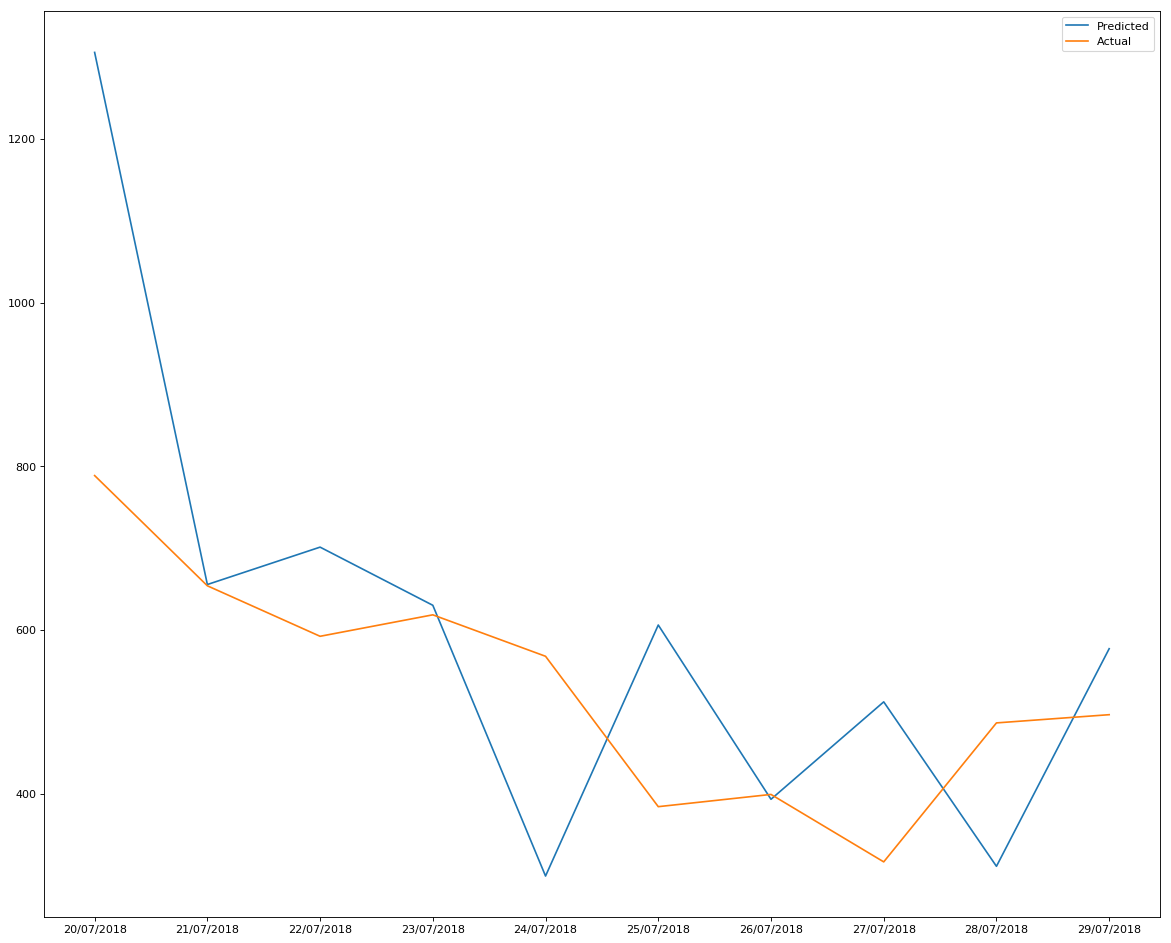

In [24]:
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()